In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("employees.csv")
df.head()
# df.tail() (son 5 satır)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [4]:
# Bunun içinde null veri var mı ve bunun sayısı ne?
df['Team'].isnull().sum() 

43

In [5]:
# Eksik veri sayısı.
df.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

    df.dropna(how=any) 
(any --> bir veri bile eksik olsa tüm satırı siler.)
(all --> tüm satır  eksik iste tamamını siler.)

    df.dropna(thresh=2) 
(thresh --> en az 2 verisi dolu olan sütunları tut gibi.)

    df.dropna(thresh=2).isnull().sum() 

    len(df.columns) 
(sütun sayısı)

    df.shape
(satır sayısı,sütun sayısı)

In [6]:
df2 = pd.DataFrame(np.random.rand(3,2),
                   columns=['sutun 1', 'surun 2'],
                   index=['a','b','c'])

In [7]:
df2

,sutun 1,surun 2
a,0.494776,0.816390
b,0.103822,0.135711
c,0.030446,0.090905


In [8]:
# Veri setini numpy array'e dönüştürür.
# pandas ---> numpy
df2.to_numpy()

array([[0.49477603, 0.8163897 ],
       [0.10382183, 0.13571054],
       [0.03044648, 0.09090489]])

In [9]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [10]:
df.Team.value_counts()

Team
Client Services         106
Finance                 102
Business Development    101
Marketing                98
Product                  95
Sales                    94
Engineering              92
Human Resources          91
Distribution             90
Legal                    88
Name: count, dtype: int64

In [11]:
# büyükten --> küçüğe
df.sort_values(by='Salary' ,ascending=False)

# küçükten --> büyüğe
# df.sort_values(by='Salary')

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
644,Katherine,Female,8/13/1996,12:21 AM,149908,18.912,False,Finance
429,Rose,Female,5/28/2015,8:40 AM,149903,5.630,False,Human Resources
828,Cynthia,Female,7/12/2006,8:55 AM,149684,7.864,False,Product
186,NaN,Female,2/23/2005,9:50 PM,149654,1.825,NaN,Sales
160,Kathy,Female,3/18/2000,7:26 PM,149563,16.991,True,Finance
...,...,...,...,...,...,...,...,...
650,Cynthia,Female,7/5/1986,1:24 AM,35381,11.749,False,Finance
63,Matthew,Male,1/2/2013,10:33 PM,35203,18.040,False,Human Resources
82,Steven,Male,3/30/1980,9:20 PM,35095,8.379,True,Client Services
238,Kevin,Male,3/25/1982,7:31 AM,35061,5.128,False,Legal


In [12]:
# Veri tipleri
df.dtypes

First Name            object
Gender                object
Start Date            object
Last Login Time       object
Salary                 int64
Bonus %              float64
Senior Management     object
Team                  object
dtype: object

In [13]:
df.sort_values(by='Salary' ,ascending=False, inplace=True)

In [14]:
# indexleri reset eder ve sıfırdan başlatır.
df.reset_index(drop=True, inplace=True)

In [15]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Katherine,Female,8/13/1996,12:21 AM,149908,18.912,False,Finance
1,Rose,Female,5/28/2015,8:40 AM,149903,5.630,False,Human Resources
2,Cynthia,Female,7/12/2006,8:55 AM,149684,7.864,False,Product
3,NaN,Female,2/23/2005,9:50 PM,149654,1.825,NaN,Sales
4,Kathy,Female,3/18/2000,7:26 PM,149563,16.991,True,Finance


Yukarıdaki tabloyu kaydetmek için

In [16]:
df.to_csv("siralanmis.csv")

# Eğer bir dosya içine kaydetmek istenirse
# df.to_csv("data \\ siralanmis.csv")

## APPLY

In [17]:
# Mesela herkese 1000 TL zam yap gibi.
df['zamli_maas']= df.Salary.apply(lambda x: x+1000)

In [18]:
df['baslangic_ayi'] = df['Start Date'].apply(lambda x: x.split('/')[0])

In [19]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team,zamli_maas,baslangic_ayi
0,Katherine,Female,8/13/1996,12:21 AM,149908,18.912,False,Finance,150908,8
1,Rose,Female,5/28/2015,8:40 AM,149903,5.630,False,Human Resources,150903,5
2,Cynthia,Female,7/12/2006,8:55 AM,149684,7.864,False,Product,150684,7
3,NaN,Female,2/23/2005,9:50 PM,149654,1.825,NaN,Sales,150654,2
4,Kathy,Female,3/18/2000,7:26 PM,149563,16.991,True,Finance,150563,3


    regex komutları

In [20]:
df['tam_sayi_bonuslar'] = df['Bonus %'].apply(lambda x: int(x))

## Aykırı Veri Analizi

<Axes: >

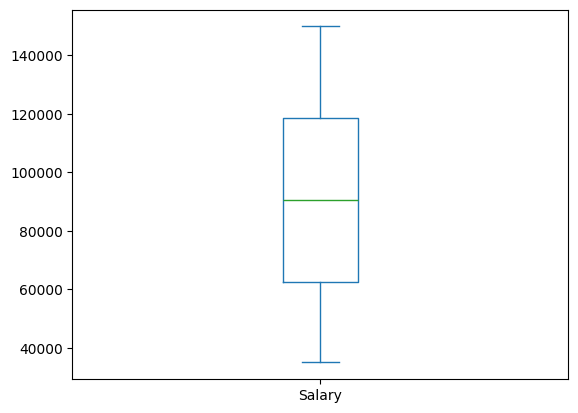

In [21]:
df['Salary'].plot(kind='box')

In [22]:
df.loc['Salary'] = 300000
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team,zamli_maas,baslangic_ayi,tam_sayi_bonuslar
0,Katherine,Female,8/13/1996,12:21 AM,149908,18.912,False,Finance,150908,8,18
1,Rose,Female,5/28/2015,8:40 AM,149903,5.630,False,Human Resources,150903,5,5
2,Cynthia,Female,7/12/2006,8:55 AM,149684,7.864,False,Product,150684,7,7
3,NaN,Female,2/23/2005,9:50 PM,149654,1.825,NaN,Sales,150654,2,1
4,Kathy,Female,3/18/2000,7:26 PM,149563,16.991,True,Finance,150563,3,16


In [23]:
# 1. çeyreği alır.
Q1 = df.Salary.quantile(0.25)
Q3 = df.Salary.quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

(62666.0, 118753.0, 56087.0)

In [24]:
# Hangi sayıdan ilerisi aykırı değer olur.
Q3 + 1.5*IQR

202883.5

## Z Skorlarına Göre Aykırı Değer Analizi

In [25]:
from scipy import stats

In [26]:
# Ortalamayı 0 kabul edersek ortalamadan kaç standat sapmış anlamına gelir

In [27]:
z = np.abs(stats.zscore(df.Salary))

In [31]:
z.shape

(1001,)

In [40]:
np.where(z>2)[0].shape

(1,)

In [47]:
# Bunun olmadığı durumlar.
df[~(z>2)]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team,zamli_maas,baslangic_ayi,tam_sayi_bonuslar
0,Katherine,Female,8/13/1996,12:21 AM,149908,18.912,False,Finance,150908,8,18
1,Rose,Female,5/28/2015,8:40 AM,149903,5.630,False,Human Resources,150903,5,5
2,Cynthia,Female,7/12/2006,8:55 AM,149684,7.864,False,Product,150684,7,7
3,NaN,Female,2/23/2005,9:50 PM,149654,1.825,NaN,Sales,150654,2,1
4,Kathy,Female,3/18/2000,7:26 PM,149563,16.991,True,Finance,150563,3,16
...,...,...,...,...,...,...,...,...,...,...,...
995,Cynthia,Female,7/5/1986,1:24 AM,35381,11.749,False,Finance,36381,7,11
996,Matthew,Male,1/2/2013,10:33 PM,35203,18.040,False,Human Resources,36203,1,18
997,Steven,Male,3/30/1980,9:20 PM,35095,8.379,True,Client Services,36095,3,8
998,Kevin,Male,3/25/1982,7:31 AM,35061,5.128,False,Legal,36061,3,5
